In [3]:
# default_exp plot.seaborn

%reload_ext autoreload
%autoreload 2

# seaborn
http://seaborn.pydata.org/introduction.html

https://blog.csdn.net/suzyu12345/article/details/69029106 

Seaborn is a library for making __statistical graphics__ in Python. It is built on top of matplotlib and closely integrated with pandas data structures.

Seaborn其实是在matplotlib的基础上进行了更高级的API封装，从而使得作图更加容易，在大多数情况下使用seaborn就能做出很具有吸引力的图，而使用matplotlib能制作具有更多特色的图。应该把Seaborn视为matplotlib的补充，而不是替代物。

__seaborns是针对统计绘图的!!!__

## install

In [9]:
# !pip install seaborn -U

!pip freeze | grep seaborn

seaborn==0.10.1


## import Seaborn

In [5]:
import seaborn as sns
sns.set(font='Arial Unicode MS')  # 解决Seaborn中文显示问题

## api doc
https://www.cntofu.com/book/172/readme.html


## 几个概念
如果使用过R语言的ggplot2绘图包，对分组分面，统计绘图等概念应该很熟悉，这里也介绍下。

### 分组绘图hue  
比如说需要在一张图上绘制两条曲线，分别是南方和北方的气温变化，分别用不同的颜色加以区分。在seaborn中用__hue参数__控制分组绘图。

### 分面绘图facet
作为的"面 facet",即子图  
其实就是在一张纸上划分不同的区域，比如2*2的子区域，在不同的子区域上绘制不同的图形，在matplotlib中就是 add_subplot(2,2,1)，在seaborn中用__col,row参数__控制，如果辅助col_wrap参数会更好些。后来发现，col可以控制columns的子图，那么row可以控制rows的子图排列。   
如果需要分面绘图，应该使用seaborn的FacetGrid对象，seaborn的一般的绘图函数是没有分面这个参数的。

### 统计函数  
分组绘图的时候，会对分组变量先要用统计函数，然后绘图，比如先计算变量的均值，然后绘制该均值的直方图。统计绘图是 __estimator参数__，很多情况下默认是numpy.mean。在ggplot2中就大量使用了这种方法。如果不使用统计绘图，就需要先用pandas进行groupby分组汇总，然后用seaborn绘图，多此一举了。

## 设置主题

### 默认主题ticks

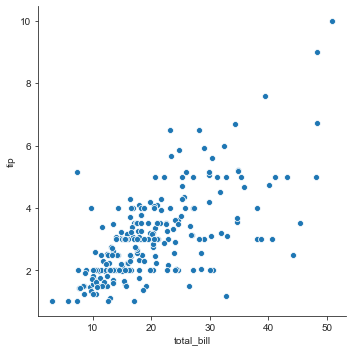

In [3]:
sns.set_style("ticks")      # 四周加边框和刻度

sns.relplot(x="total_bill", y="tip", data=tips);

还有其他几个主题，包括：

### darkgrid灰色网格背景

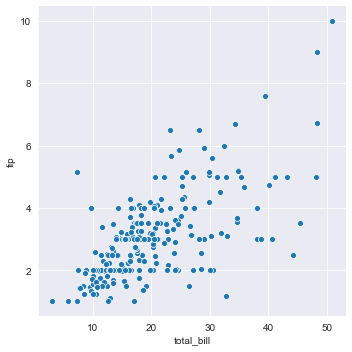

In [13]:
sns.set_style("darkgrid")   # 灰色网格背景

sns.relplot(x="total_bill", y="tip", data=tips);

### whitegrid白色网格背景

In [5]:
sns.set_style("whitegrid")  # 白色网格背景

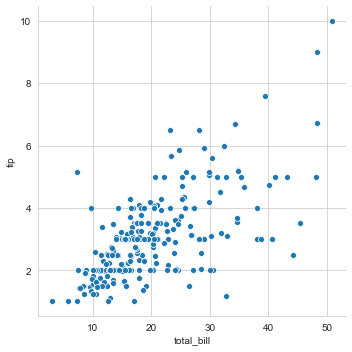

In [6]:
sns.relplot(x="total_bill", y="tip", data=tips);

### dark灰色背景

In [7]:
sns.set_style("dark")       # 灰色背景

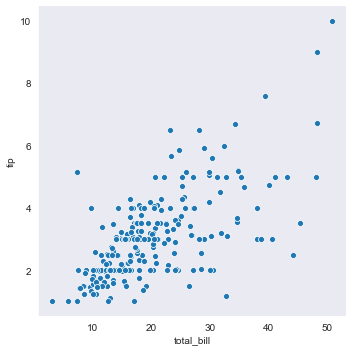

In [8]:
sns.relplot(x="total_bill", y="tip", data=tips);

### white白色背景

In [9]:
sns.set_style("white")      # 白色背景

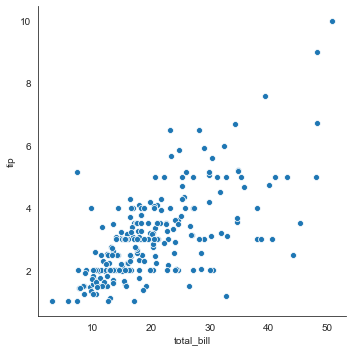

In [10]:
sns.relplot(x="total_bill", y="tip", data=tips);

## 设置Context
Set the plotting context parameters.

This affects things like the size of the labels, lines, and other elements of the plot, but not the overall style. The base context is “notebook”, and the other contexts are “paper”, “talk”, and “poster”, which are version of the notebook parameters scaled by .8, 1.3, and 1.6, respectively.

In [ ]:
seaborn.set_context(context="talk")

## 设置颜色

颜色一般来说用默认的颜色就好了，而且也比较好看，如果非要设置颜色，可以通过sns.set_palette("husl")设置。 
常用的其他颜色模式还有：

In [ ]:
sns.set_palette("muted")    # 常用
sns.set_palette("RdBu")
sns.set_palette("Blues_d")
sns.set_palette("Set1")
sns.set_palette("RdBu")

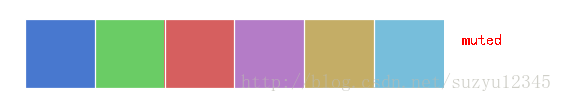

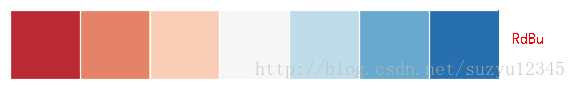

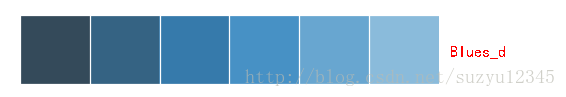

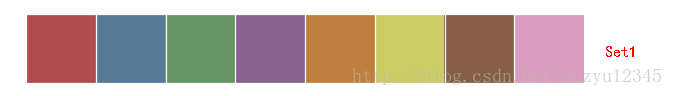

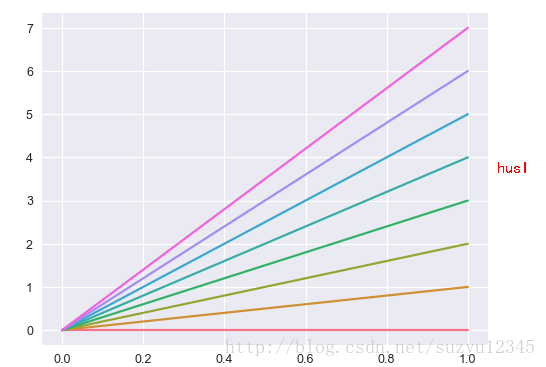

# Visualizing statistical relationships可视化的统计关系
http://seaborn.pydata.org/tutorial/relational.html

统计分析是了解数据集中的变量如何相互关联以及这些关系如何依赖于其他变量的过程。 可视化可能是此过程的核心组成部分，因为当正确地可视化数据时，人类视觉系统可以看到指示关系的趋势和模式。

在本教程中，我们将讨论三个基本功能。 我们最常使用的一个是relplot（）。 这是一种图形级功能，可使用两种常用方法可视化统计关系：
* scatter plots散点图
* line plots折线图。 

relplot（）将FacetGrid与两个轴级函数之一结合在一起：

    scatterplot() (with kind="scatter"; the default)

    lineplot() (with kind="line")

就像我们将看到的那样，这些函数很有启发性，因为它们使用了简单易懂的数据表示形式，但是它们仍然可以表示复杂的数据集结构。 之所以能够这样做，是因为他们绘制了二维图形，可以通过使用
* hue(色调), 
* size
* style

的语义映射最多三个其他变量来增强二维图形。

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

## Relating variables with scatter plots
### 适合于x是连续值，y也是连续值

散点图是统计可视化的主体。 它使用点云描绘了两个变量的联合分布，其中每个点代表数据集中的观测值。 这种描述使眼睛可以推断出有关它们之间是否存在任何有意义关系的大量信息。

有几种方法可以在Seaborn中绘制散点图。 当两个变量都是数字时，应该使用的最基本的是scatterplot（）函数。 在分类可视化教程中，我们将看到用于使用散点图可视化分类数据的专用工具。 scatterplot（）是relplot（）中的默认种类（也可以通过设置kind =“ scatter”来强制使用）：

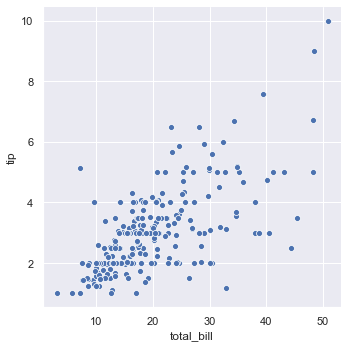

In [7]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

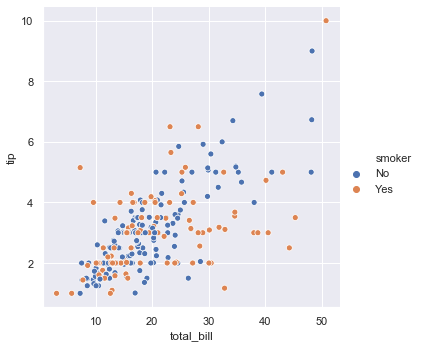

In [8]:
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

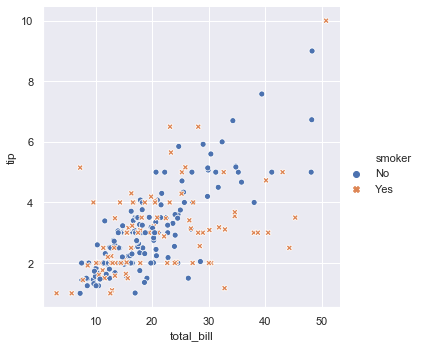

In [9]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker",
            data=tips);

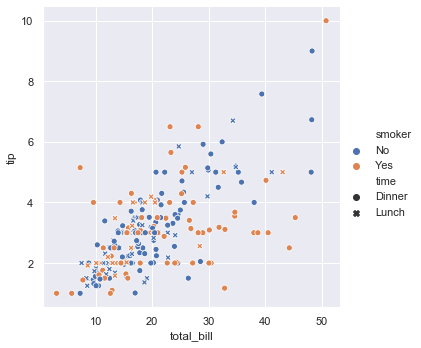

In [10]:
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

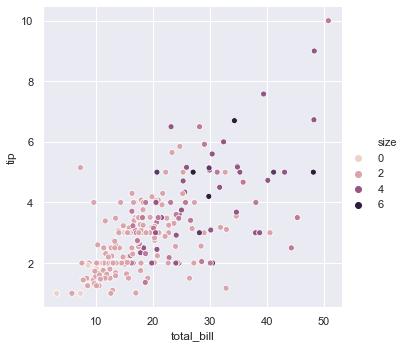

In [11]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

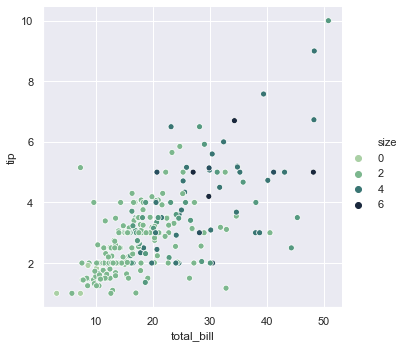

In [12]:
sns.relplot(x="total_bill", y="tip", hue="size", palette="ch:r=-.5,l=.75", data=tips);

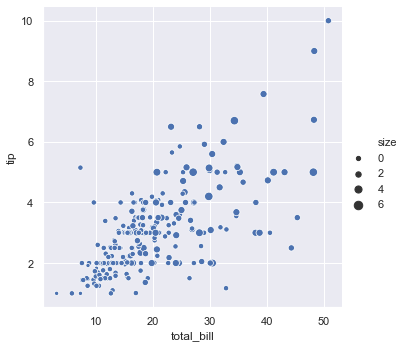

In [13]:
sns.relplot(x="total_bill", y="tip", size="size", data=tips);

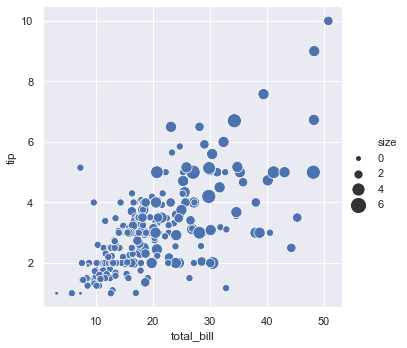

In [14]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

## Emphasizing continuity with line plots
散点图非常有效，但是没有通用的最佳可视化类型。 取而代之的是，视觉表示应适合于数据集的细节以及您试图用图解回答的问题。

对于某些数据集，您可能想了解一个变量随时间的变化或类似的连续变量。 在这种情况下，一个不错的选择是绘制一条线图。 在seaborn中，可以通过lineplot（）函数直接或通过设置kind =“ line”使用relplot（）来实现：

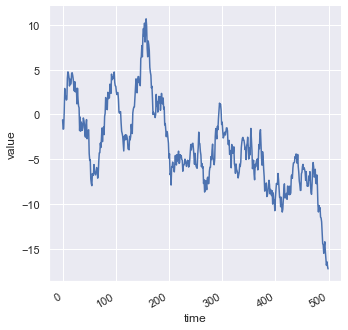

In [15]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

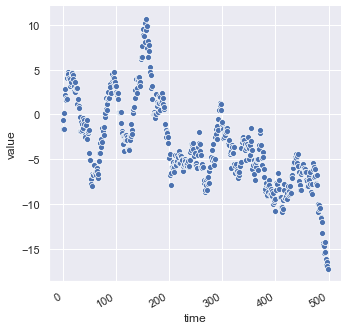

In [16]:
g = sns.relplot(x="time", y="value", kind="scatter", data=df)
g.fig.autofmt_xdate()

因为lineplot（）假定您最经常尝试将y绘制为x的函数，所以默认行为是在绘制之前按x值对数据进行排序。 但是，可以将其禁用：

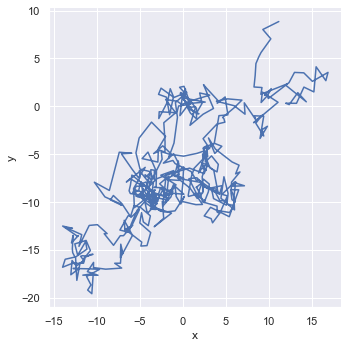

In [17]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
sns.relplot(x="x", y="y", sort=False, kind="line", data=df);

## Aggregation and representing uncertainty
对于x变量的相同值，更复杂的数据集将具有多个度量。 

seaborn的默认行为是通过绘制均值和均值周围的95％置信区间来汇总每个x值的多次测量：

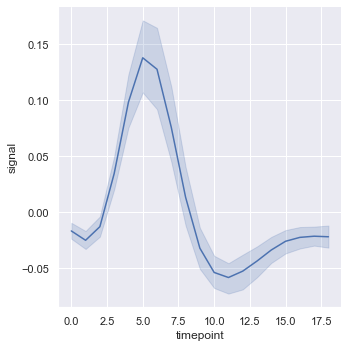

In [18]:
fmri = sns.load_dataset("fmri")
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

使用自举计算置信区间，对于较大的数据集，这可能会占用大量时间。 因此可以禁用它们：

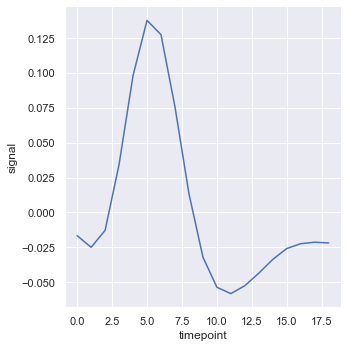

In [19]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

另一个很好的选择，尤其是对于较大的数据，尤其适合通过绘制标准偏差(standard deviation)而不是置信区间来表示每个时间点的分布范围：

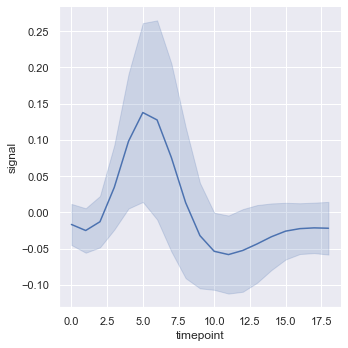

In [20]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

要完全关闭聚合，请将estimator参数设置为None。当数据在每个点上都有多个观测值时，这可能会产生奇怪的效果。

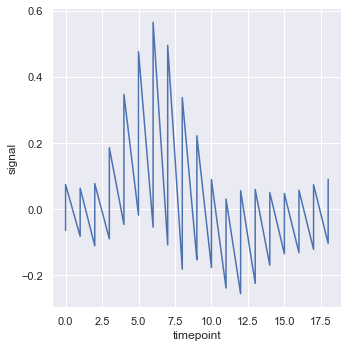

In [21]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

## Plotting subsets of data with semantic mappings使用语义映射绘制数据子集
lineplot（）函数具有与scatterplot（）相同的灵活性：通过修改绘图元素的色相，大小和样式，它最多可以显示三个附加变量。 它使用与scatterplot（）相同的API来执行此操作，这意味着我们无需停下来思考用于控制matplotlib中线与点外观的参数。

在lineplot（）中使用语义还将确定如何聚合数据。 例如，添加具有两个级别的hue语义会将plot分成两条线和错误带，分别对它们上色以指示它们所对应的数据子集。

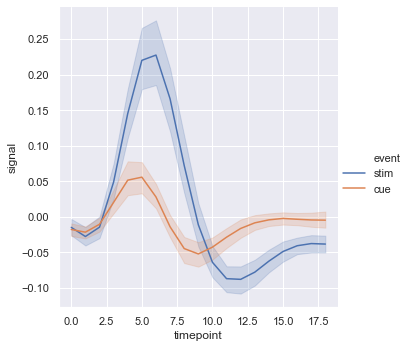

In [22]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

默认情况下，向线条图中添加样式语义会更改线条中的dashes模式：

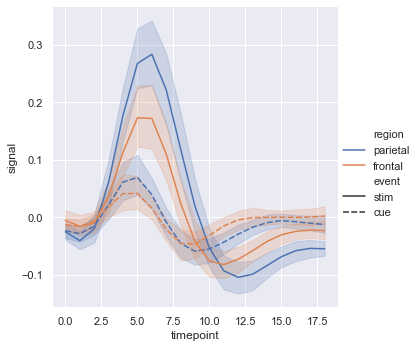

In [23]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            kind="line", data=fmri);


但是，您可以通过每个观察点处使用的标记来标识子集，或者与dash一起使用，也可以代替dash：

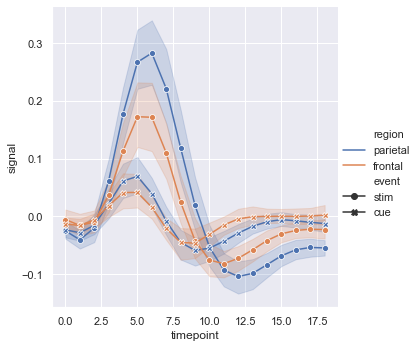

In [24]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event",
            dashes=False, markers=True, kind="line", data=fmri);

与散点图一样，请谨慎使用多种语义绘制线图。 尽管有时内容丰富，但它们也可能难以解析和解释。 但是，即使仅检查一个附加变量的变化，也可以同时更改线条的颜色和样式。 当打印成黑白或有色盲人士查看时，这可以使图更易于访问：


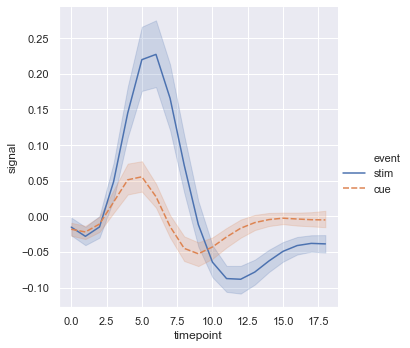

In [25]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            kind="line", data=fmri);


当您使用重复的度量数据时（即，您有多次采样的单位），还可以单独绘制每个采样单位，而不必通过语义区分它们。 这样可以避免使图例混乱：

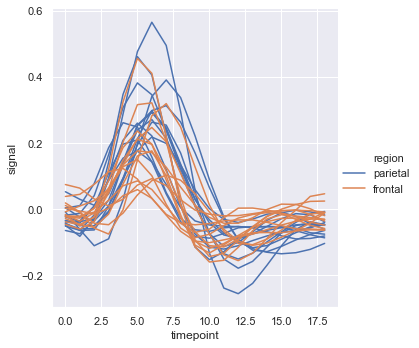

In [26]:
sns.relplot(x="timepoint", y="signal", hue="region",
            units="subject", estimator=None,
            kind="line", data=fmri.query("event == 'stim'"));

lineplot（）中图例的默认颜色图和处理方式还取决于色相语义是分类的还是数字的：

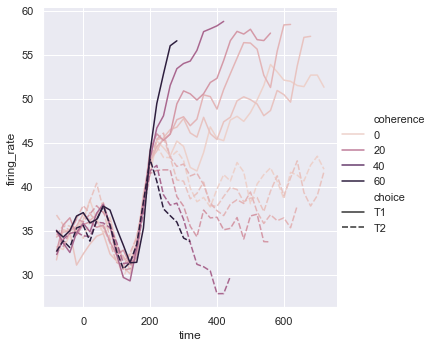

In [27]:
dots = sns.load_dataset("dots").query("align == 'dots'")
sns.relplot(x="time", y="firing_rate",
            hue="coherence", style="choice",
            kind="line", data=dots);

## Plotting with date data
线图通常用于可视化与实际日期和时间关联的数据。 这些函数将原始格式的数据向下传递给底层的matplotlib函数，因此它们可以利用matplotlib的功能来对刻度标签中的日期进行格式化。 但是所有这些格式化都必须在matplotlib层进行，您应该参考matplotlib文档以了解其工作原理：

/Users/luoyonggui/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


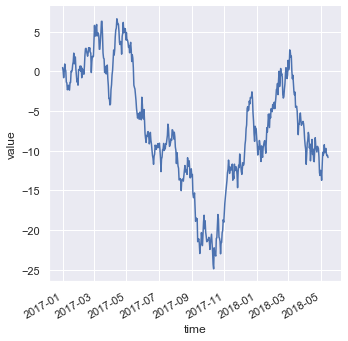

In [28]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

## Showing multiple relationships with facets

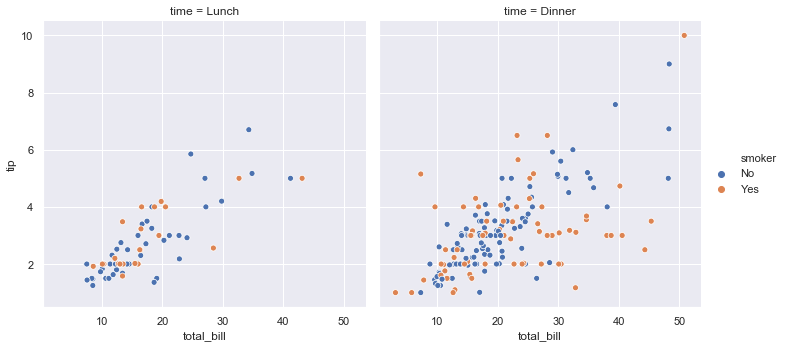

In [29]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

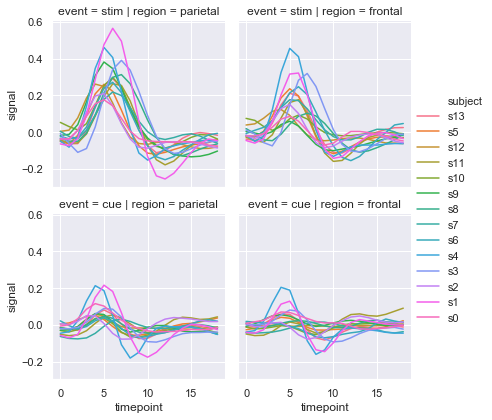

In [30]:
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

# Plotting with categorical data
http://seaborn.pydata.org/tutorial/categorical.html

在关系图教程中，我们看到了如何使用不同的视觉表示来显示数据集中多个变量之间的关系。 在示例中，我们重点研究了两个数字变量之间的主要关系。 如果主要变量之一是“分类”（分为离散组），则使用更专业的方法进行可视化可能会有所帮助。

在seaborn中，有几种不同的方法可以可视化涉及分类数据的关系。 与relplot（）与scatterplot（）或lineplot（）之间的关系类似，有两种方法可以制作这些图。 有许多轴级函数以不同方式绘制分类数据，而图形级接口catplot（）则可以对它们进行统一的高级访问。

可以将不同的分类图类型归为三个不同的族，这将很有帮助，我们将在下面对此进行详细讨论。 他们是：

分类散点图：


    stripplot() (with kind="strip"; the default)

    swarmplot() (with kind="swarm")
    
Categorical distribution plots:

    boxplot() (with kind="box")

    violinplot() (with kind="violin")

    boxenplot() (with kind="boxen")

Categorical estimate plots:

    pointplot() (with kind="point")

    barplot() (with kind="bar")

    countplot() (with kind="count")

这些族使用不同级别的粒度表示数据。 在决定使用哪个时，您必须考虑要回答的问题。 统一的API使您可以轻松地在不同种类之间进行切换，并从多个角度查看数据。

在本教程中，我们将主要关注图形级界面catplot（）。 请记住，该函数是上面每个函数的高层接口，因此当我们显示每种图形时，我们将引用它们，同时保留更详细的特定于种类的API文档。

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)

## Categorical scatterplots
### x是分类变量，y是数值型变量
catplot（）中数据的默认表示使用散点图。 Seaborn中实际上有两个不同的类别散点图。 他们采用不同的方法来解决用散点图表示分类数据的主要挑战，这就是属于一个类别的所有点都将沿着与分类变量相对应的轴落在同一位置。 stripplot（）使用的方法是catplot（）中的默认“种类”，它是通过少量随机“抖动”来调整点在分类轴上的位置：

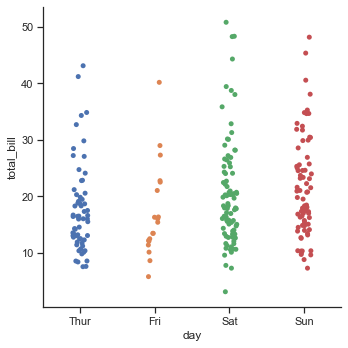

In [32]:
tips = sns.load_dataset("tips")
sns.catplot(x="day", y="total_bill", data=tips);

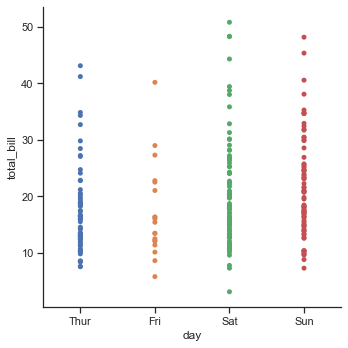

In [33]:
sns.catplot(x="day", y="total_bill", jitter=False, data=tips);

第二种方法是使用防止重叠的算法沿分类轴调整点。 尽管它仅适用于相对较小的数据集，但它可以更好地表示观测值的分布。 这种图有时称为“蜂群”，由swarmplot（）在seaborn中绘制，通过在catplot（）中设置kind =“ swarm”激活该图：

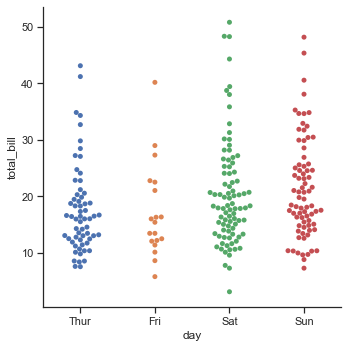

In [34]:
sns.catplot(x="day", y="total_bill", kind="swarm", data=tips);

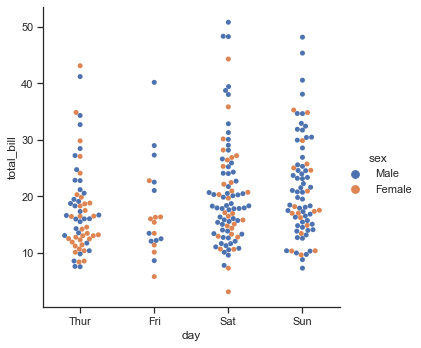

In [35]:
sns.catplot(x="day", y="total_bill", hue="sex", kind="swarm", data=tips);


选择默认顺序的另一个选项是采用类别级别，因为它们出现在数据集中。 还可以使用order参数在特定于绘图的基础上控制排序。 当在同一图中绘制多个分类图时，这一点可能很重要，我们将在下文中详细介绍：

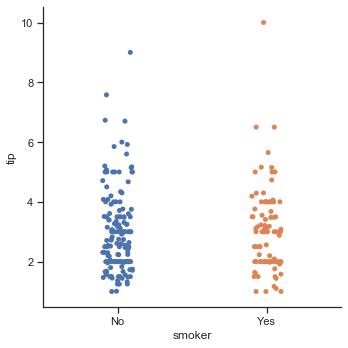

In [36]:
sns.catplot(x="smoker", y="tip", order=["No", "Yes"], data=tips);

我们提到了“分类轴”的概念。 在这些示例中，它始终与水平轴相对应。 但是将类别变量放在垂直轴上通常会很有帮助（尤其是在类别名称相对较长或类别很多时）。 为此，将变量分配分配给轴：

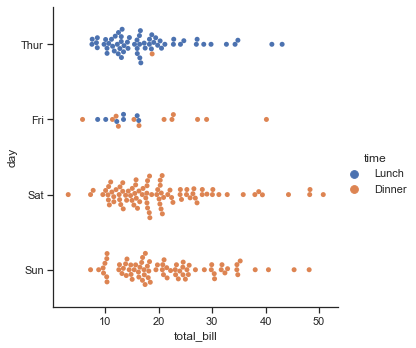

In [37]:
sns.catplot(x="total_bill", y="day", hue="time", kind="swarm", data=tips);

## Distributions of observations within categories
### x是分类变量，y是数值型变量
随着数据集大小的增长，分类散点图在它们可以提供的有关每个类别中值的分布的信息方面受到限制。 发生这种情况时，有几种方法可以方便地在类别级别之间进行比较，从而汇总分发信息。

### Boxplots

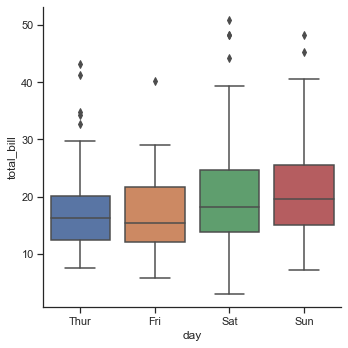

In [38]:
sns.catplot(x="day", y="total_bill", kind="box", data=tips);



添加色相语义时，语义变量的每个级别的框都沿着分类轴移动，因此它们不会重叠：

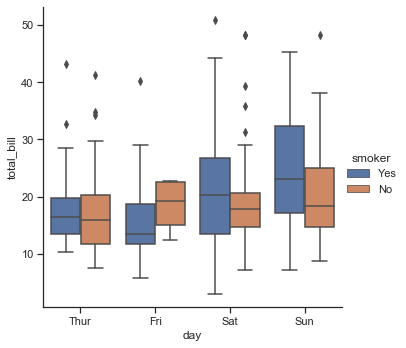

In [39]:
sns.catplot(x="day", y="total_bill", hue="smoker", kind="box", data=tips);

此行为称为“dodging”，默认情况下处于启用状态，因为假定语义变量嵌套在主类别变量中。 如果不是这种情况，可以禁用dodging：

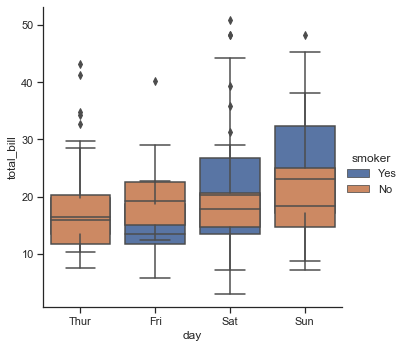

In [42]:
sns.catplot(x="day", y="total_bill", hue="smoker", dodge=False, kind="box", data=tips);

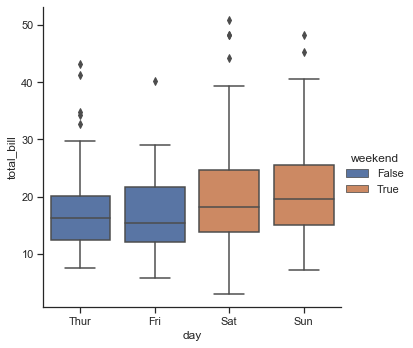

In [41]:
tips["weekend"] = tips["day"].isin(["Sat", "Sun"])
sns.catplot(x="day", y="total_bill", hue="weekend",
            kind="box", dodge=False, data=tips);

一个相关的函数boxenplot（）绘制与箱形图相似的图，但已优化以显示有关分布形状的更多信息。 最适合较大的数据集：

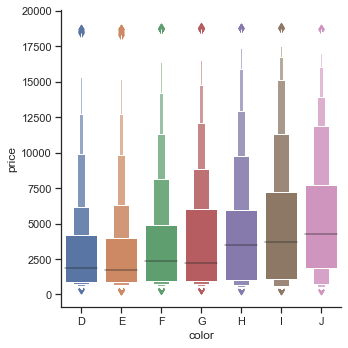

In [43]:
diamonds = sns.load_dataset("diamonds")
sns.catplot(x="color", y="price", kind="boxen",
            data=diamonds.sort_values("color"));

### Violinplots

另一种方法是violinplot()，它将箱线图与distributions教程中描述的内核密度估计过程结合在一起

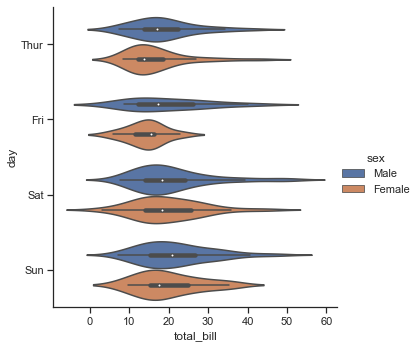

In [44]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", data=tips);

此方法使用内核密度估计来提供值分布的更丰富的描述。 此外，小提琴内还显示了箱形​​图的四分位和晶须值。 缺点是，由于小提琴图使用KDE，因此可能需要调整一些其他参数，这相对于简单的箱图增加了一些复杂性：

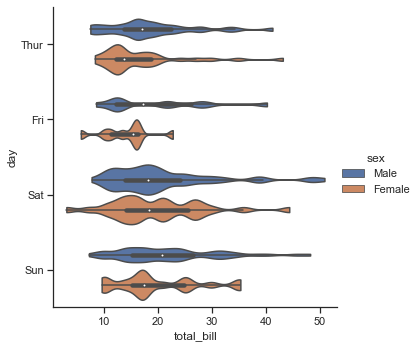

In [45]:
sns.catplot(x="total_bill", y="day", hue="sex",
            kind="violin", bw=.15, cut=0,
            data=tips);

当色调参数只有两个层次时，也可以拆分小提琴，这可以允许更有效地利用空间

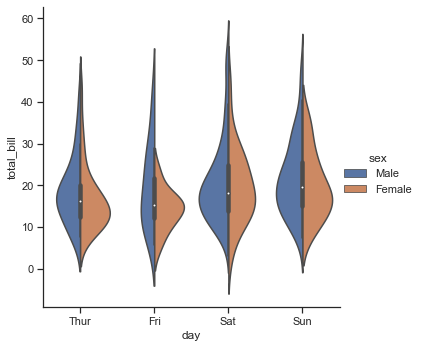

In [46]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", split=True, data=tips);


最后，在小提琴内部绘制的图有几个选项，包括显示每个观察值而不是汇总箱图值的方法：

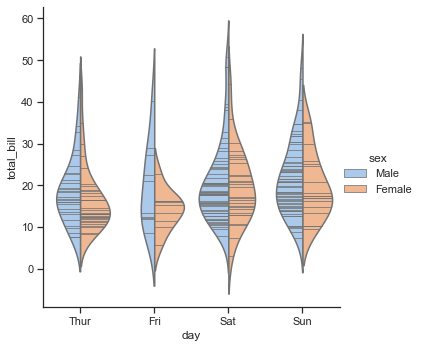

In [47]:
sns.catplot(x="day", y="total_bill", hue="sex",
            kind="violin", inner="stick", split=True,
            palette="pastel", data=tips);

将swarmplot（）或striplot（）与箱形图或小提琴图结合使用以显示每个观察结果以及分布摘要也可能很有用：

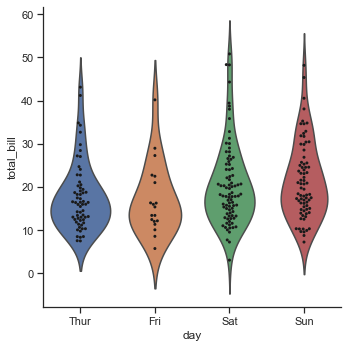

In [48]:
g = sns.catplot(x="day", y="total_bill", kind="violin", inner=None, data=tips)
sns.swarmplot(x="day", y="total_bill", color="k", size=3, data=tips, ax=g.ax);

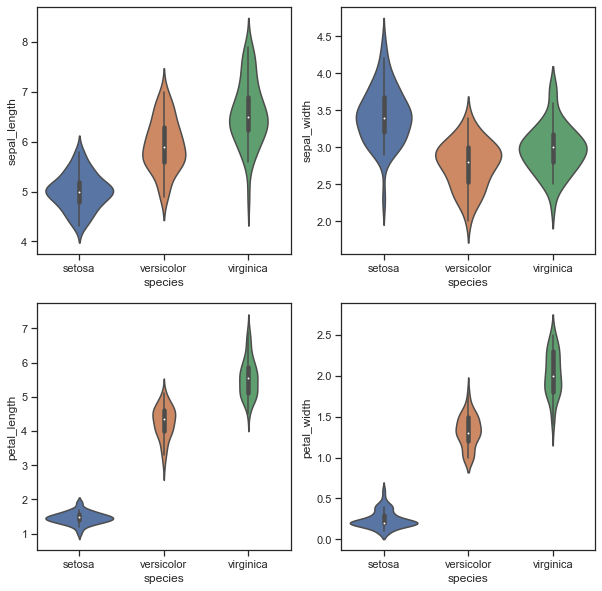

In [77]:
plt.figure(figsize=(10, 10))
for i, col in enumerate(iris.columns[:-1]):
    plt.subplot(2, 2, i+1)
    sns.violinplot(x='species', y=col, data=iris)

## heapmap热力图
### x是分类变量，y是数值型变量

In [71]:
uniform_data = np.random.rand(10, 12)
uniform_data

array([[0.80734715, 0.37426904, 0.14758604, 0.61493101, 0.91204097,
        0.63281877, 0.53154724, 0.75171099, 0.60353676, 0.69921146,
        0.61899188, 0.85623207],
       [0.91968463, 0.30838739, 0.94445325, 0.32300003, 0.48243267,
        0.91752166, 0.60787723, 0.13447132, 0.26337714, 0.50115884,
        0.2869072 , 0.56816479],
       [0.46126143, 0.63703289, 0.67258777, 0.71222414, 0.48109778,
        0.0662745 , 0.66949865, 0.3672911 , 0.69978962, 0.10382065,
        0.29426156, 0.05487708],
       [0.53569146, 0.50412332, 0.14566425, 0.08558268, 0.22006491,
        0.25049236, 0.25419108, 0.72852496, 0.45716613, 0.91075246,
        0.03180699, 0.87259025],
       [0.93777005, 0.38657393, 0.5976778 , 0.87716742, 0.29484409,
        0.79903933, 0.46023774, 0.41847739, 0.68744979, 0.93403551,
        0.55579635, 0.85252133],
       [0.11963297, 0.71672751, 0.19510354, 0.12745404, 0.00333836,
        0.76089987, 0.36263915, 0.32342437, 0.26675646, 0.18358173,
        0.93845736,

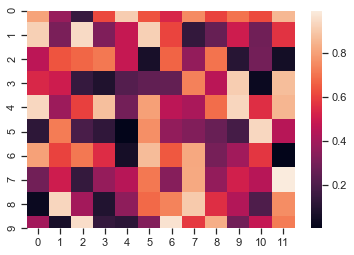

In [72]:
ax = sns.heatmap(uniform_data)

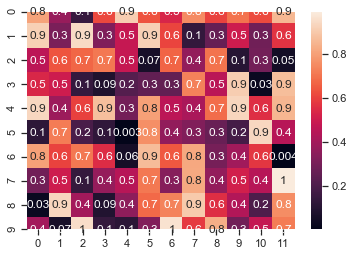

In [73]:
ax = sns.heatmap(uniform_data, annot=True, fmt=".1g")

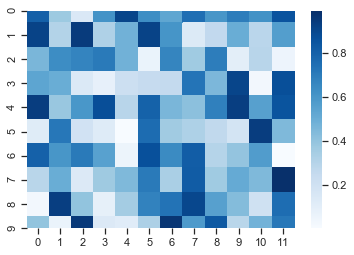

In [75]:
ax = sns.heatmap(uniform_data, cmap='Blues')

## Statistical estimation within categories
### x是分类变量，y也是分类变量
对于其他应用程序，您可能不希望显示每个类别内的分布，而是希望显示这些值的集中趋势的估计值。 Seaborn有两种显示此信息的主要方法。 重要的是，这些功能的基本API与上述功能相同。

### Bar plots
达到此目标的熟悉的情节样式是条形图。 在seaborn中，barplot（）函数对完整的数据集进行运算，并应用函数来获取估计值（默认为均值）。 当每个类别中都有多个观察值时，它还会使用自举法来计算估计值周围的置信区间，并使用误差线进行绘制：

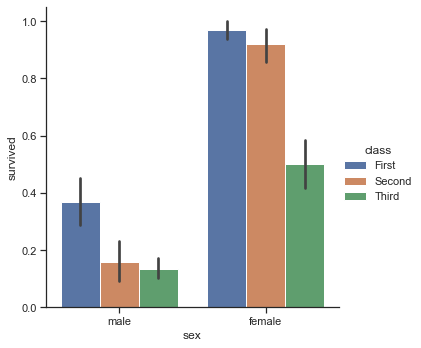

In [49]:
titanic = sns.load_dataset("titanic")
sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic);

条形图的一种特殊情况是，您想显示每个类别中的观测值数量，而不是为第二个变量计算统计量。 这类似于分类变量而非定量变量的直方图。 在seaborn，使用countplot（）函数很容易做到

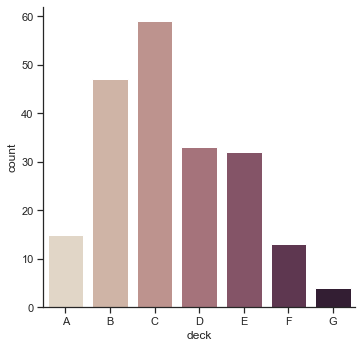

In [50]:
sns.catplot(x="deck", kind="count", palette="ch:.25", data=titanic);


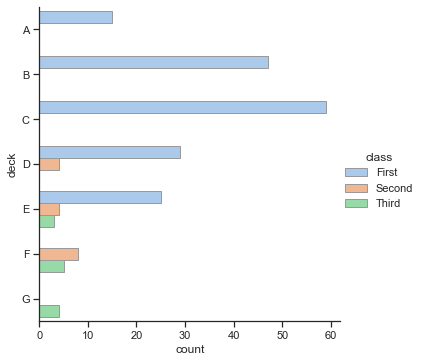

In [51]:
sns.catplot(y="deck", hue="class", kind="count",
            palette="pastel", edgecolor=".6",
            data=titanic);

# Visualizing the distribution of a dataset
http://seaborn.pydata.org/tutorial/distributions.html

处理一组数据时，通常要做的第一件事就是了解变量的分布方式。 本教程的这一章将简要介绍seaborn中用于检查单变量和双变量分布的一些工具。 您可能还需要查看“类别图”一章，以获取函数示例，这些函数可以轻松比较变量在其他变量级别之间的分布。

## Plotting univariate distributions绘制单变量分布
### x是连续变量
快速查看seaborn中的单变量分布的最便捷方法是distplot（）函数。 默认情况下，这将绘制直方图并适合内核密度估计（KDE）。

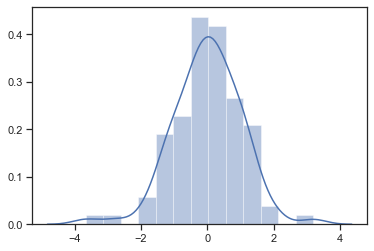

In [52]:
x = np.random.normal(size=100)
sns.distplot(x);

### Histograms直方图
直方图可能很熟悉，并且matplotlib中已经存在一个hist函数。 直方图通过沿数据范围形成bin，然后绘制条形以显示落在每个bin中的观察次数来表示数据的分布。

为了说明这一点，让我们删除密度曲线并添加一个地毯图，该图在每次观察时都会绘制一个小的垂直刻度。 您可以使用rugplot（）函数制作地毯图，但也可以在distplot（）中使用它：

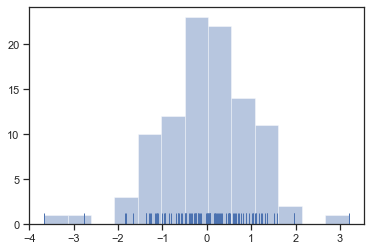

In [53]:
sns.distplot(x, kde=False, rug=True);

绘制直方图时，主要的选择是要使用的number of bins 以及放置bin的位置。 distplot（）使用一条简单的规则来很好地猜测默认值是多少，但是尝试更多或更少的bin可能会揭示数据中的其他功能：

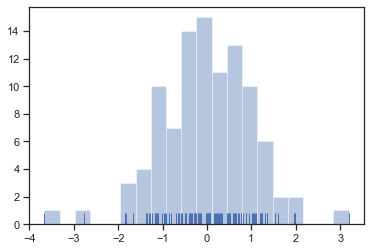

In [54]:
sns.distplot(x, bins=20, kde=False, rug=True);

## Plotting bivariate distributions绘制双变量分布
可视化两个变量的双变量分布也很有用。 在seaborn中执行此操作的最简单方法是只使用jointplot（）函数，该函数创建一个多面板图形，该图形显示两个变量之间的双变量（或联合）关系以及每个变量的单变量（或边际）分布。 分开的轴。

In [55]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])



### Scatterplots
可视化双变量分布的最熟悉的方法是散点图，其中每个观察点的点均位于x和y值处。 这类似于二维的地毯图。 您可以使用scatterplot（）绘制散点图，这也是jointplot（）函数显示的默认图样：

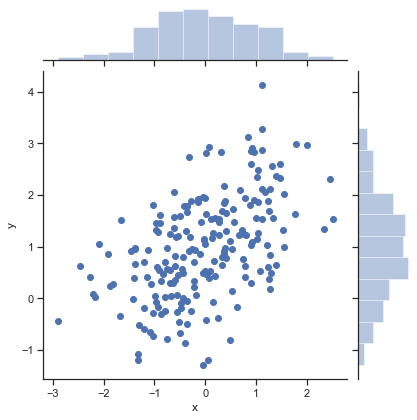

In [56]:
sns.jointplot(x="x", y="y", data=df);


### Hexbin plots六边形图
直方图的双变量类似物称为“六边形”图，因为它显示了落在六边形箱中的观测值。 此图最适合相对较大的数据集。 在matplotlib中可以通过matplotlib.axes.Axes.hexbin（）或在jointplot（）中作为样式来使用。 在白色背景下看起来最好：

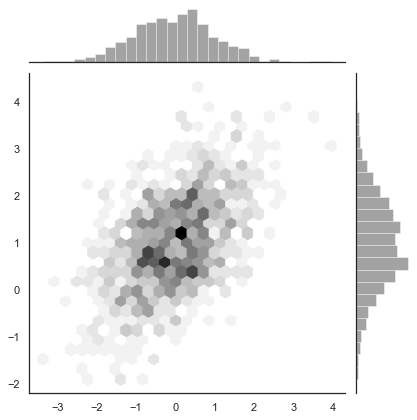

In [57]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

## Visualizing pairwise relationships in a dataset
要在数据集中绘制成对的双变量分布，可以使用pairplot（）函数。 这将创建轴矩阵，并显示DataFrame中每对列的关系。 默认情况下，它还会在对角轴上绘制每个变量的单变量分布：

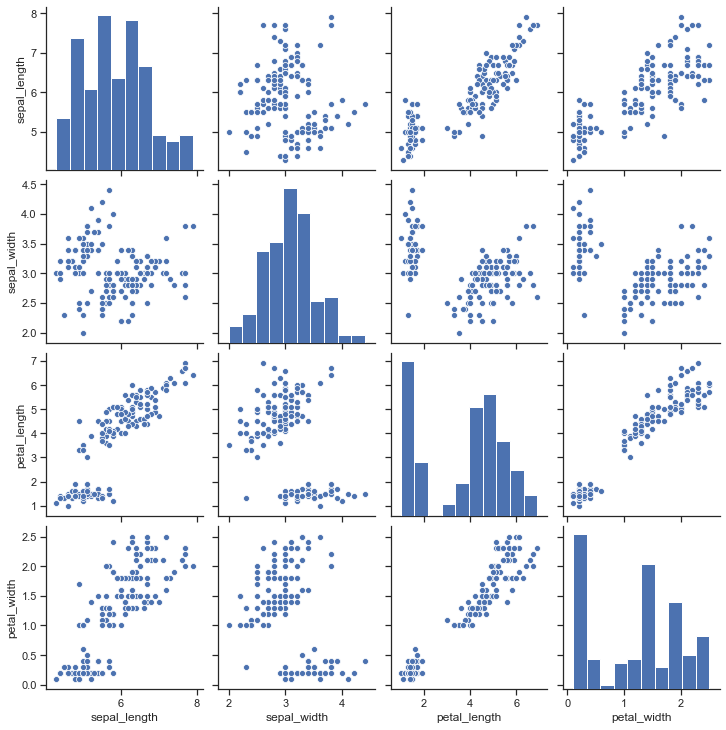

In [58]:
iris = sns.load_dataset("iris")
sns.pairplot(iris);

指定hue参数会自动将直方图更改为KDE图，以便于在多个分布之间进行比较。

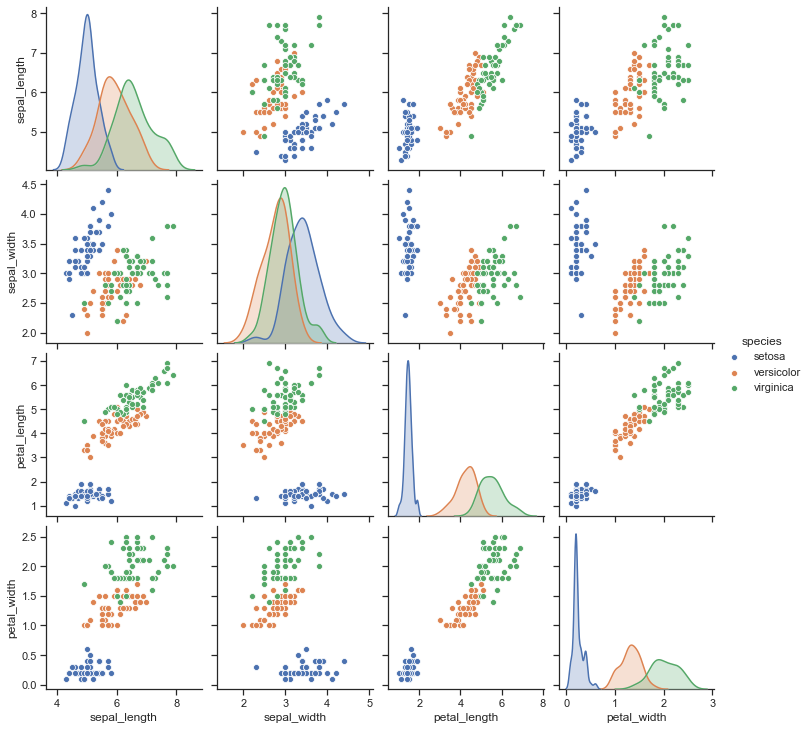

In [59]:
sns.pairplot(iris, hue="species");

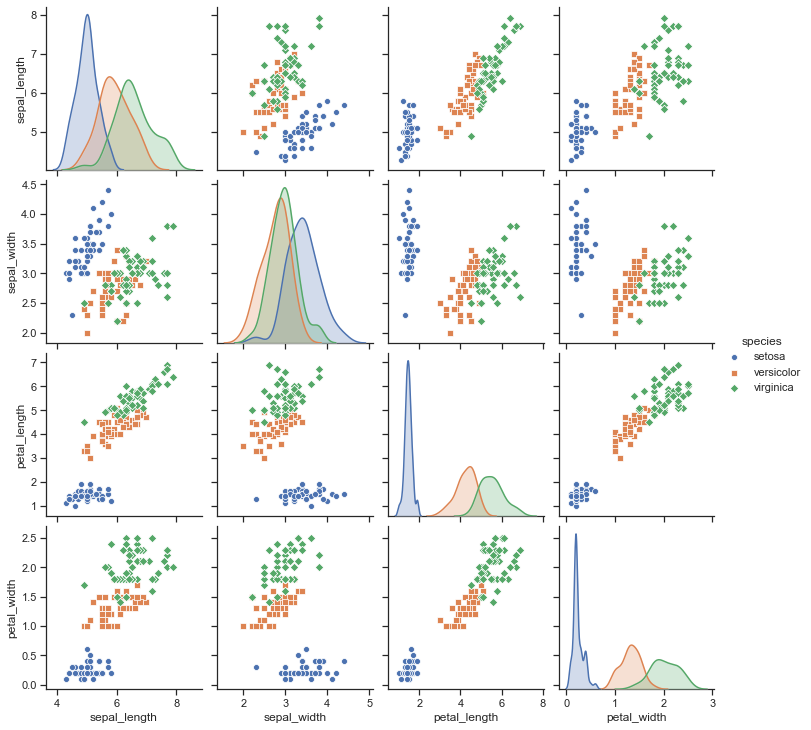

In [62]:
g = sns.pairplot(iris, hue="species", markers=["o", "s", "D"])

In [63]:
g

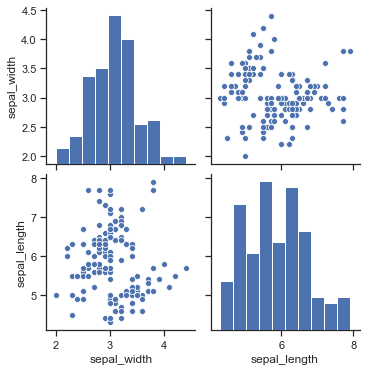

In [64]:
g = sns.pairplot(iris, vars=["sepal_width", "sepal_length"])

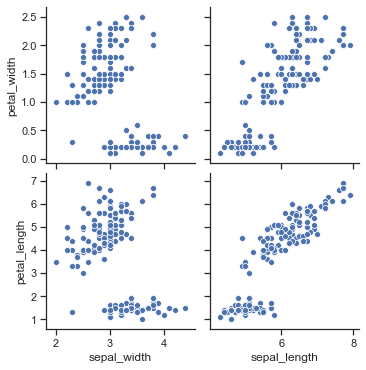

In [66]:
g = sns.pairplot(iris,
                          x_vars=["sepal_width", "sepal_length"],
                      y_vars=["petal_width", "petal_length"])

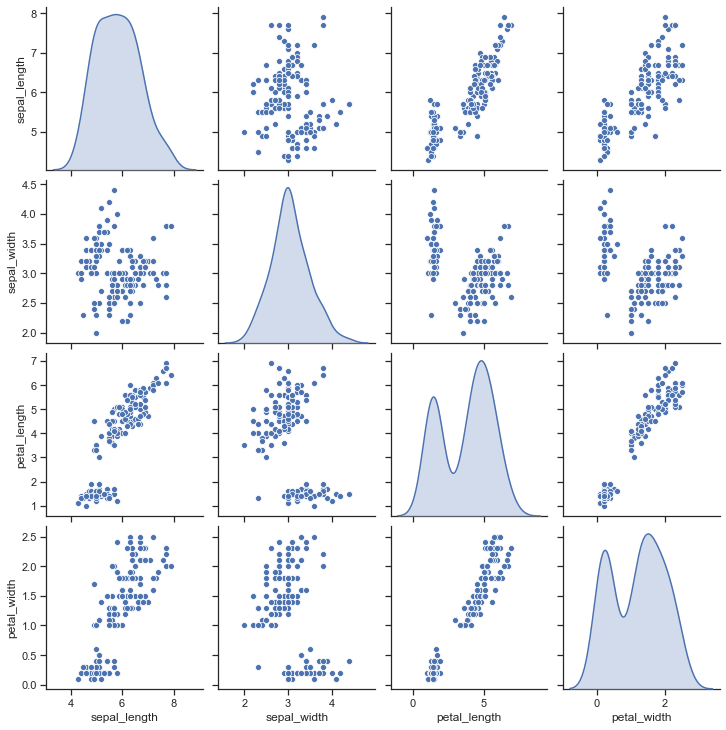

In [68]:
g = sns.pairplot(iris, diag_kind="kde")

### Fit linear regression models to the scatter plots:

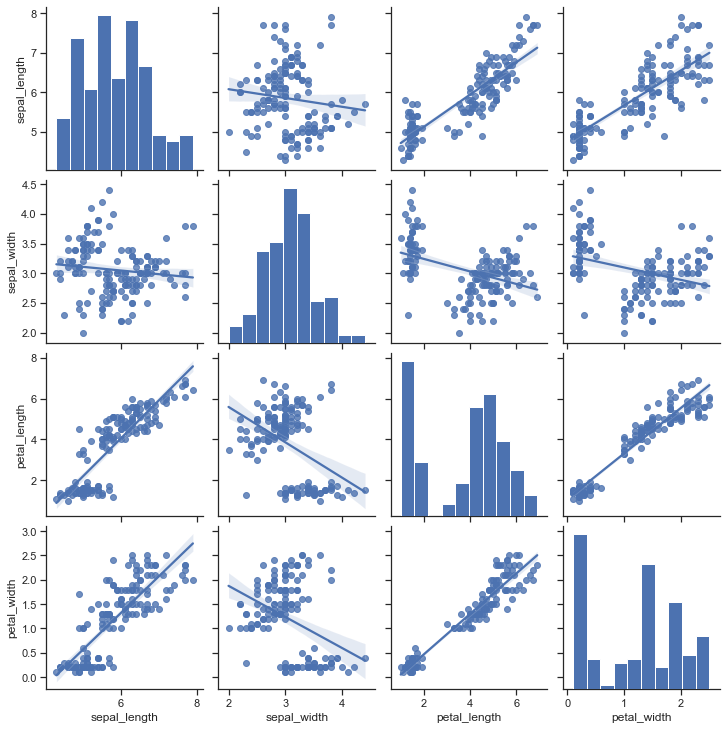

In [70]:
g = sns.pairplot(iris, kind="reg")

pairplot（）函数与Pairplot（）和JointGrid之间的关系非常相似，它建立在PairGrid对象的顶部，可以直接用于更大的灵活性：

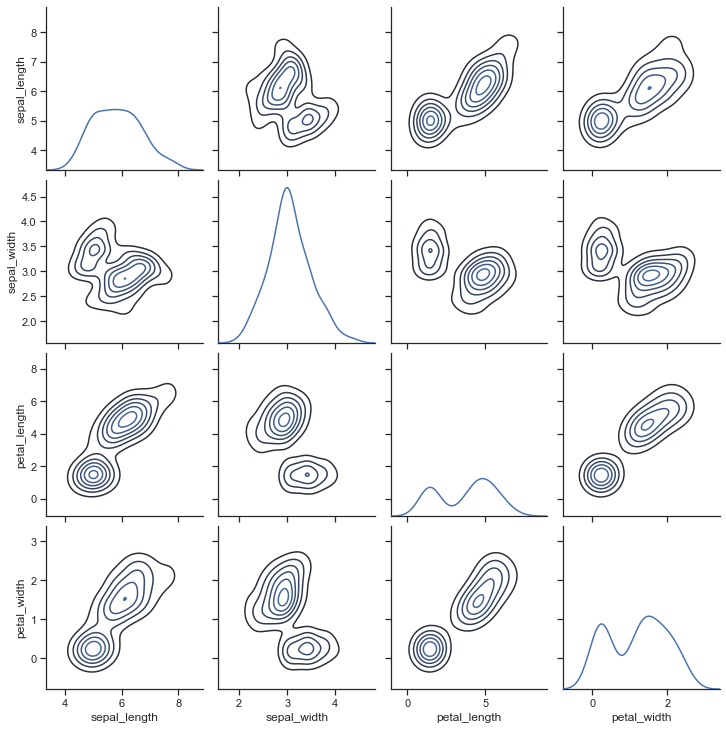

In [60]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=6);

# Visualizing linear relationships
http://seaborn.pydata.org/tutorial/regression.html

许多数据集包含多个定量变量，分析的目的通常是将这些变量彼此关联。 前面我们讨论了可以通过显示两个变量的联合分布来完成此功能的函数。 但是，使用统计模型来估计两个嘈杂的观测值之间的简单关系可能非常有帮助。 本章讨论的功能将通过线性回归的通用框架来实现。

本着Tukey的精神，seaborn的回归图主要旨在添加可视指南，以帮助在探索性数据分析过程中强调数据集中的模式。 也就是说，seaborn本身并不是统计分析的工具包。 要获得与回归模型的拟合相关的定量度量，应使用statsmodels。 但是，seaborn的目标是使通过可视化快速而轻松地浏览数据集变得容易，因为这样做与通过统计表浏览数据集一样重要。